[  1.00000000e+04   1.00000000e+04   1.00000000e+01   1.00000000e+04
   1.00000000e+01   2.50000000e-08   5.00000000e-10]
[2083 1959 1978 2002 2001 2070 2012 2056 2014 2041]
Relationship between PSP and theta_hat; slope: 5.84559402451 intercept -0.00765739555633
Linear fit of theta_hat-gsyn; R: 0.998013245398 p-value 6.80016087001e-11
Relationship between PSP and theta_hat; slope: 4.34961311881 intercept -0.00462454660448
Linear fit of theta_hat-gsyn; R: 0.998418254426 p-value 2.73337990619e-11
[2083 1959 1978 2002 2001 2070 2012 2056 2014 2041] [  194.13954072   381.64673739   502.40167694   752.26136072   871.87748451
  1118.5991119   1276.2893587   1455.76540315  1645.32607505  1733.516429  ]
Linear fit of theta_hat-theta; R: 0.538832536857 p-value 0.108031533619


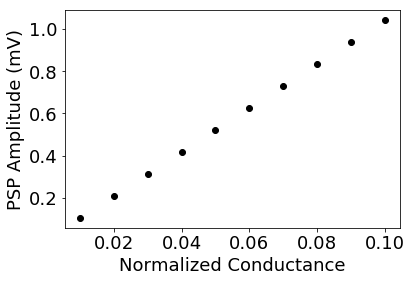

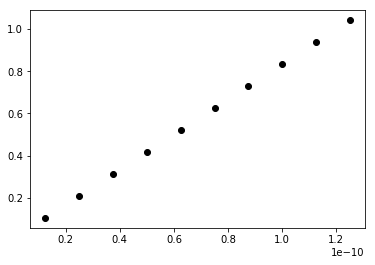

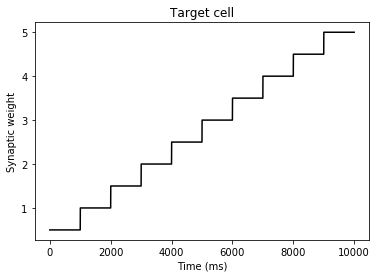

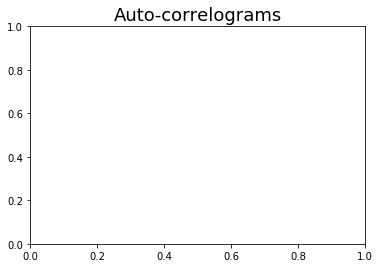

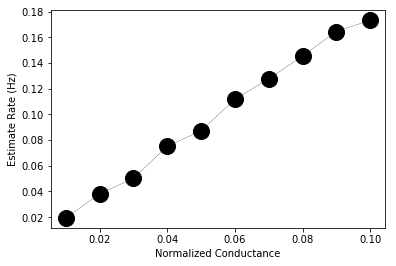

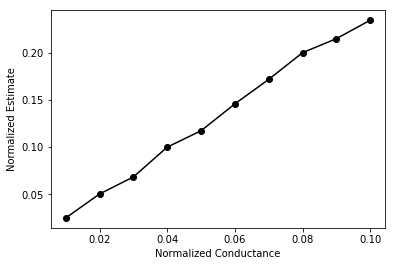

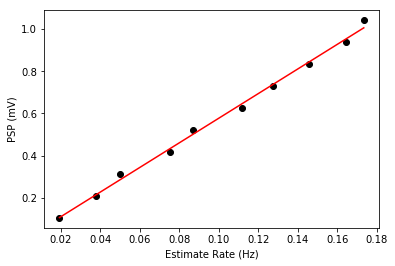

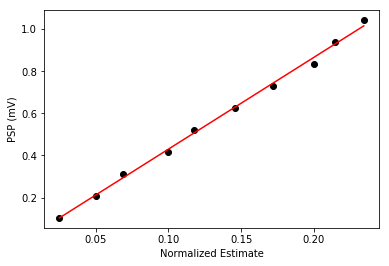

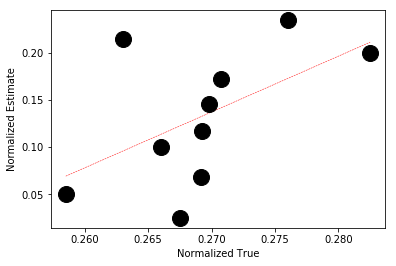

In [2]:
#------------------------------------------------------------------------------
# Imports
#------------------------------------------------------------------------------

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from ccg import correlograms

def compthta(Rtemp,Ttemp,delta):
    Sobs = len(np.intersect1d(Rtemp,Ttemp))
    mxSpk = np.max(np.append(Rtemp,Ttemp))
    bEdges = np.arange(0,mxSpk,delta)
    bo = histc(Rtemp, bEdges) 
    refCounts = np.append(bo[0],0)
    w = np.floor(Ttemp/delta)
    Nr = refCounts[w.astype('int')]
    Nr = Nr[Nr!=0]/delta
    naive = Sobs - np.sum(Nr)
    thtahat = naive/(1-((1/len(Nr))*np.sum(Nr)))
    return thtahat

def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]
#------------------------------------------------------------------------------
# Load spike data
#------------------------------------------------------------------------------

#train_ref = np.load('train_ref_static.npy')     # Collection of reference spike trains
#train_targ = np.load('train_targ_static.npy')   # Collection of target spike trains
#train_ref0 = np.load('train_ref0_static.npy')   # Collection of reference spike trains (no synapse)
#train_targ0 = np.load('train_targ0_static.npy') # Collection of target spike trains (no synapse)
params = np.load('parameters.npy')
weight_value = np.load('weights.npy')
#Ntrial = int(params[0])                              # Number of trials
#duration = params[1]                            # Trial duration in (ms)
#period = params[2]                              # Nonstationarity timescale in (ms)
#Fs = params[3]
#Nphase = int(params[4])
phase = duration/Nphase
Nphase = int(Nphase)
#gm = params[5]
#g0 = params[6]

print(params)

train = np.append(train_ref,train_targ)
cell = np.int64(np.append(np.zeros(len(train_ref)),np.ones(len(train_targ))))

#------------------------------------------------------------------------------
# Analyze spike data
#------------------------------------------------------------------------------

# Measure the distribution of synchrony count before injection
synch_width = 1.*5
#--WITH SYNAPSE--
Tref = synch_width*np.floor(train_ref/synch_width)
lmax = 0.#lag[np.argmax(Craw[0,1])]
x = (train_targ-lmax)*(np.sign(train_targ-lmax)+1)/2.
x = x[np.nonzero(x)]
Ttarg = synch_width*np.floor(train_targ/synch_width)
Tsynch = np.array(list(set(Tref) & set(Ttarg)))
synch_count = np.bincount(np.int64(np.floor(Tsynch/(Ntrial*phase))),minlength=Nphase)
#--WITHOUT SYNAPSE--
Tref0 = synch_width*np.floor(train_ref0/synch_width)
lmax0 = 0.#lag[np.argmax(Craw0[0,1])]
x = (train_targ0-lmax0)*(np.sign(train_targ0-lmax0)+1)/2.
x = x[np.nonzero(x)]
Ttarg0 = synch_width*np.floor(x/synch_width)
Tsynch0 = np.array(list(set(Tref0) & set(Ttarg0)))
synch_count0 = np.bincount(np.int64(np.floor(Tsynch0/(Ntrial*phase))),minlength=Nphase)

# Check the optimal synchrony window 
#Nsynch = 100 
#synch_width_range = np.linspace(.1,10,Nsynch)
#s = np.zeros(Nsynch)
#s0 = np.zeros(Nsynch)
#lmax = 0.#lag[np.argmax(Craw[0,1])]
##print(latency/ms,lmax)
#lmax0 = 0.#lag[np.argmax(Craw0[0,1])]
#for k in range(Nsynch):
#    synch_width = synch_width_range[k]
#    #--WITH SYNAPSE--
#    Tref = synch_width*np.floor(train_ref/synch_width)
#    x = (train_targ-lmax)*(np.sign(train_targ-lmax)+1)/2.
#    x = x[np.nonzero(x)]
#    Ttarg = synch_width*np.floor(x/synch_width)
#    Tsynch = np.array(list(set(Tref) & set(Ttarg)))
#    synch_count = np.bincount(np.int64(np.floor(Tsynch/(Ntrial*phase))),minlength=Nphase)
#    s[k] = np.mean(synch_count)
#    #--WITHOUT SYNAPSE--
#    Tref0 = synch_width*np.floor(train_ref0/synch_width)
#    x = (train_targ0-lmax0)*(np.sign(train_targ0-lmax0)+1)/2.
#    x = x[np.nonzero(x)]
#    Ttarg0 = synch_width*np.floor(x/synch_width)
#    Tsynch0 = np.array(list(set(Tref0) & set(Ttarg0)))
#    synch_count0 = np.bincount(np.int64(np.floor(Tsynch0/(Ntrial*phase))),minlength=Nphase)
#    s0[k] = np.mean(synch_count0)
#plt.figure()
##plt.plot(synch_width_range,(np.amax(Craw[0,1])-np.amax(Craw0[0,1]))*np.ones(Nsynch),'--r')
#plt.plot(synch_width_range,s-s0,'--k')
#plt.figure()
##plt.plot(synch_width_range,np.amax(Craw[0,1])*np.ones(Nsynch),'--r')
##plt.plot(synch_width_range,np.amax(Craw0[0,1])*np.ones(Nsynch),'--g')
#plt.plot(synch_width_range,s,'o-k')
#plt.plot(synch_width_range,s0,'o-c')
#plt.show()    
#exit()

#print(synch_count,synch_count0)
#print(synch_count-synch_count0)

# Excess synchrony count unbiased estimation
delta = period
Ndelta = int(Ntrial*duration/delta)
count_ref = np.bincount(np.int64(np.floor(train_ref/delta)),minlength=Ndelta)
count_targ = np.bincount(np.int64(np.floor(train_targ/delta)),minlength=Ndelta)
count_synch = np.bincount(np.int64(np.floor(Tsynch/delta)),minlength=Ndelta)
Ndelta_phase = int(Ntrial*phase/delta)
RS_prod = np.sum(np.reshape(count_ref*count_synch,(Nphase,Ndelta_phase)),axis=1)
alpha = RS_prod/(delta*synch_count)  
RT_prod = np.sum(np.reshape(count_ref*count_targ,(Nphase,Ndelta_phase)),axis=1)
#alphaN = alpha[~np.isnan(alpha)]
#synch_countN = synch_count[~np.isnan(alpha)]
#RT_prodN = RT_prod[~np.isnan(alpha)]
estimate = (delta*synch_count-RT_prod)/(delta*synch_count-RS_prod)*synch_count

# Evaluate the true injected synchrony count by comparing conditions "synapse on" and "synapse off"
injected_true = (synch_count-synch_count0)#*1./synch_count
print(injected_true)


estimate = []; synchOn = []
indT = np.digitize(train_targ%duration,np.arange(0,12000,1000)) - 1
indR = np.digitize(train_ref%duration,np.arange(0,12000,1000)) - 1
for k in range(int(len(np.unique(indT)))):
    temp = compthta(np.round(train_ref[indR==k]),np.round(train_targ[indT==k]),delta)
    estimate = np.append(estimate,temp)
    temp = len(np.intersect1d(np.round(train_ref[indR==k]),np.round(train_targ[indT==k])))
    synchOn = np.append(synchOn,temp)
# ==================Zach revisions =======================

synchOff = []
indT = np.digitize(train_targ0%duration,np.arange(0,12000,1000)) - 1
indR = np.digitize(train_ref0%duration,np.arange(0,12000,1000)) - 1
for k in range(int(len(np.unique(indT)))):
    temp = len(np.intersect1d(np.round(train_ref0[indR==k]),np.round(train_targ0[indT==k])))
    synchOff = np.append(synchOff,temp)



# Check the result
plt.figure()
#plt.xlim(0,.1)
plt.xlabel('Normalized Conductance')
plt.ylabel('Estimate Rate (Hz)')
x = g0/gm*weight_value
y = estimate/(Ntrial*phase*.001)
#gradient,intercept,r_value,p_value,std_err = stats.linregress(x,y)
#print("Relationship between theta_hat and gsyn; slope:",gradient,"intercept",intercept)
#print("Linear fit of theta_hat-gsyn; R:",r_value,"p-value",p_value)
ind = np.argsort(x)
x = x[ind]
y = y[ind]
plt.plot(x,y,'o-k',linewidth=.25,markersize=16)
#plt.plot(x,gradient*x+intercept,'-r')
FigPredic = plt.figure()
plt.xlabel('Normalized Conductance')
plt.ylabel('Normalized Estimate')
x = g0/gm*weight_value
y = estimate*1./synch_count
ind = np.argsort(x)
x = x[ind]
y = y[ind]
plt.plot(x,y,'o-k')
plt.figure()
plt.xlabel('Estimate Rate (Hz)')
plt.ylabel('PSP (mV)')
x = estimate/(Ntrial*phase*.001)
y = g0*weight_value*(0-(-50))/120.*10**9
gradient,intercept,r_value,p_value,std_err = stats.linregress(x,y)
print("Relationship between PSP and theta_hat; slope:",gradient,"intercept",intercept)
print("Linear fit of theta_hat-gsyn; R:",r_value,"p-value",p_value)
plt.plot(x,y,'ok')
plt.plot(x,gradient*x+intercept,'-r')
plt.figure()
plt.xlabel('Normalized Estimate')
plt.ylabel('PSP (mV)')
x = estimate*1./synch_count
y = g0*weight_value*(0-(-50))/120.*10**9
gradient,intercept,r_value,p_value,std_err = stats.linregress(x,y)
print("Relationship between PSP and theta_hat; slope:",gradient,"intercept",intercept)
print("Linear fit of theta_hat-gsyn; R:",r_value,"p-value",p_value)
plt.plot(x,y,'ok')
plt.plot(x,gradient*x+intercept,'-r')
#plt.show()
#exit()
# Sigmoidal fit
#sigmoid = lambda params: params[2]**2/2*(1-special.erf((params[0]**2-x)/(params[1]**2*np.sqrt(2))))
#p2 = np.sqrt(np.amax(y))
#ind = np.amax(np.where(y<=np.amax(y)/2.)[0])
#p0 = np.sqrt(y[ind])
#dx = x[1]-x[0]
#dy = zeros(len(y))
#dy[1:-1] = (y[2:]-y[:-2])/(2*dx)
#p1 = np.sqrt(dy[ind]*np.sqrt(np.pi/2.))
#p,_ = optimize.leastsq(sigmoid,array([p0,p1,p2]))
#print(p0,p1,p2)
#print(p[0],p[1],p[2])
#plt.plot(x,y,'ok')
#plt.plot(x,p[2]/2*(1-special.erf((p[0]**2-x)/(p[1]**2*np.sqrt(2)))),'r')
#plt.figure()
#plt.plot(x,synch_count-synch_count0,'ob')
FigCheck = plt.figure()
plt.xlabel('Normalized True')
plt.ylabel('Normalized Estimate')
#plt.xlim(0,.5)
print(injected_true,estimate)
x = injected_true*1./synch_count#(Ntrial*phase*.001)
y = estimate*1./synch_count#(Ntrial*phase*.001)
gradient,intercept,r_value,p_value,std_err = stats.linregress(x,y)
print("Linear fit of theta_hat-theta; R:",r_value,"p-value",p_value)
#plt.plot([np.amin(y),np.amax(y)],[np.amin(y),np.amax(y)],'k')
mM = np.array([np.amin(x),np.amax(x)])
plt.plot(mM,gradient*mM+intercept,'--r',linewidth=.5)
plt.plot(x,y,'ok',markersize=16)
plt.show()

FigPredic.savefig('Fig_prediction-conductance.eps')
FigCheck.savefig('Fig_prediction-injected-on-off.eps')

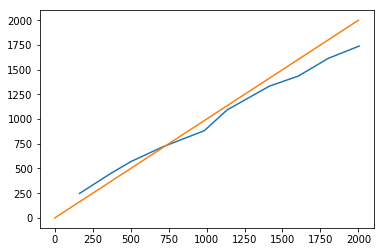

In [24]:
plt.plot(synchOn-synchOff,estimate)
plt.plot(np.array([0,2e3]),np.array([0,2e3]))

[0.10416667 0.20833333 0.3125     0.41666667 0.52083333 0.625
 0.72916667 0.83333333 0.9375     1.04166667] S


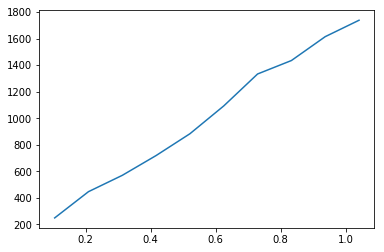

In [25]:
y = g0*weight_value*(0-(-50))/120.*10**9
plt.plot(y,estimate)
print(y)

WARNING    /Users/asohanmath/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
 [py.warnings]


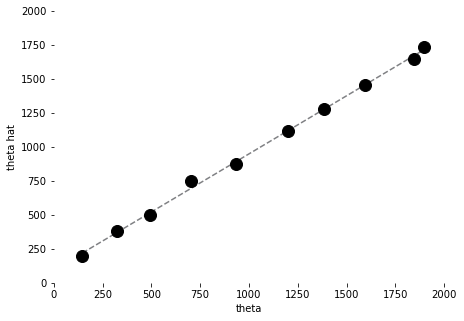

In [14]:
x = synchOn-synchOff
y = estimate
P = np.polyfit(x, y, 1)
xx = np.linspace(np.min(x),np.max(x),1e3)
yy = P[0]*xx + P[1]

FigEst = plt.figure(figsize=(7,5))
colG = np.array([128,129,132])/255
plt.plot(xx,yy,color=colG,linestyle='--')
plt.plot(synchOn-synchOff,estimate,'ok',color='k',markersize=12)
plt.xlim([0,2000])
plt.ylim([0,2000])
plt.xlabel('theta')
plt.ylabel('theta hat')
plt.box('off')
plt.show()
FigEst.savefig('Fig_zach_Fig8C1.eps')
FigEst.savefig('Fig_zach_Fig8C1.tif')

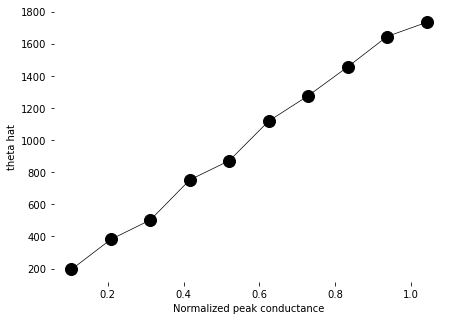

In [13]:
FigCon = plt.figure(figsize=(7,5))
y = g0*weight_value*(0-(-50))/120.*10**9
plt.plot(y,estimate,color='k',linewidth=.7)
plt.plot(y,estimate,'ok',color='k',markersize=12)
plt.xlabel('Normalized peak conductance')
plt.ylabel('theta hat')
plt.box('off')
plt.show()
FigCon.savefig('Fig_zach_Fig8C2.eps')
FigCon.savefig('Fig_zach_Fig8C2.tif')